In [49]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Stats
import scipy.stats as ss
from numpy import interp

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Time
from contextlib import contextmanager
@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [50]:
# Generate a secure secret key (run in Python shell):
import secrets
print(secrets.token_hex(16))  # Copy this output


e2b7c3059a91baa2e34e32b267bf0f68


In [51]:
data = pd.read_csv('diabetes.csv')

In [52]:
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# Split the data into two groups based on the 'Outcome'
diabetic_patients = data[data['Outcome'] != 0]
non_diabetic_patients = data[data['Outcome'] == 0]

# ------------- BAR CHART FOR OUTCOME COUNTS -------------
def plot_outcome_counts():
    bar_trace = go.Bar(
        x=data['Outcome'].value_counts().values.tolist(),
        y=['Healthy', 'Diabetic'],
        orientation='h',
        text=data['Outcome'].value_counts().values.tolist(),
        textfont=dict(size=15),
        textposition='auto',
        opacity=0.8,
        marker=dict(
            color=['mediumseagreen', 'tomato'],
            line=dict(color='#000000', width=1.5)
        )
    )
    
    layout_config = dict(title='Outcome Counts Distribution')
    fig = dict(data=[bar_trace], layout=layout_config)
    py.iplot(fig)

# ------------- PIE CHART FOR OUTCOME PERCENTAGES -------------
def plot_outcome_percentages():
    pie_trace = go.Pie(
        labels=['Healthy', 'Diabetic'],
        values=data['Outcome'].value_counts(),
        textfont=dict(size=15),
        opacity=0.8,
        marker=dict(
            colors=['mediumseagreen', 'tomato'],
            line=dict(color='#000000', width=1.5)
        )
    )
    
    layout_config = dict(title='Outcome Percentage Distribution')
    fig = dict(data=[pie_trace], layout=layout_config)
    py.iplot(fig)

# Call the functions to display the plots
plot_outcome_counts()
plot_outcome_percentages()


## Missing Values

In [54]:
# Replace zeros with NaN in columns where 0 likely indicates missing data
# data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the median of each column
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the relevant columns
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.fit_transform(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

# Proceed with your model training and testing


In [55]:
# Function to visualize missing values for a specific column in the dataset
def plot_missing_values(dataset, column_key):
    # Calculate the count of non-missing values for the specified column
    non_missing_counts = pd.DataFrame(len(dataset[column_key]) - dataset.isnull().sum(), columns=['Count'])
    
    # Calculate the percentage of missing values for the specified column
    missing_percentage = pd.DataFrame(
        ((len(dataset[column_key]) - (len(dataset[column_key]) - dataset.isnull().sum())) / len(dataset[column_key]) * 100),
        columns=['Count']
    ).round(2)
    
    # Create a bar chart using a new color (Tomato Red: #FF6347)
    bar_trace = go.Bar(
        x=non_missing_counts.index,
        y=non_missing_counts['Count'],
        opacity=0.8,
        text=missing_percentage['Count'],
        textposition='auto',
        marker=dict(
            color='#FF6347',  # Updated color for the bars
            line=dict(color='#000000', width=1.5)
        )
    )
    
    # Define the layout of the plot
    layout_config = dict(title="Missing Values (Count & %)")
    
    # Combine the trace and layout into a figure and display it
    fig = dict(data=[bar_trace], layout=layout_config)
    py.iplot(fig)
    
# Plot the missing values for the 'Outcome' column using the function
plot_missing_values(data, 'Outcome')


In [56]:
def plot_correlation_matrix():
    # Compute the correlation matrix for the dataset
    corr_matrix = data.corr()
    
    # Extract the list of column names to use as labels
    labels = corr_matrix.columns.tolist()
    
    # Convert the correlation matrix to a NumPy array for plotting
    corr_values = np.array(corr_matrix)
    
    # Create a heatmap using an alternative colorscale (e.g., 'Cividis')
    heatmap_trace = go.Heatmap(
        z=corr_values,
        x=labels,
        y=labels,
        colorscale='Cividis',  # Changed colorscale from 'Viridis' to 'Cividis'
        colorbar=dict()
    )
    
    # Set up the layout for the plot
    layout_config = go.Layout(
        dict(
            title='Correlation Matrix for Variables',
            margin=dict(r=0, l=100, t=0, b=100),
            yaxis=dict(tickfont=dict(size=9)),
            xaxis=dict(tickfont=dict(size=9))
        )
    )
    
    # Create the figure and display it
    fig = go.Figure(data=[heatmap_trace], layout=layout_config)
    py.iplot(fig)

# Call the function to display the correlation matrix plot
plot_correlation_matrix()


### Insulin

In [57]:
import plotly.figure_factory as ff
import plotly.offline as py

def plot_distribution(data_select, size_bin=5):  
    global data  # Ensure 'data' is recognized globally
    if 'data' not in globals():
        raise NameError("Dataset 'data' is not defined. Please load it first.")

    # Correct dataset variable name
    D = data[data['Outcome'] == 1]  # Diabetic patients
    H = data[data['Outcome'] == 0]  # Healthy patients

    tmp1 = D[data_select].dropna()
    tmp2 = H[data_select].dropna()
    
    hist_data = [tmp1, tmp2]
    group_labels = ['Diabetic', 'Healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors=colors, show_hist=True, bin_size=size_bin, curve_type='kde')
    
    fig.update_layout(title_text=data_select)
    py.iplot(fig)

# Now call the function
plot_distribution('Insulin', 5)



In [58]:
data['Insulin'].median()


30.5

#### Insulin's medians by the target are really different ! 102.5 for a healthy person and 169.5 for a diabetic person

In [59]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

### Glucose

In [60]:
plot_distribution('Glucose', 0)

In [61]:
data['Glucose'].median()



117.0

In [62]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

### Skin Thickness

In [63]:
plot_distribution('SkinThickness', 10)

In [64]:
data['SkinThickness'].median()

23.0

In [65]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

### Blood pressure

In [66]:
plot_distribution('BloodPressure', 5)

In [67]:
data['BloodPressure'].median()

72.0

In [68]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

### BMI

In [69]:
plot_distribution('BMI', 0)

In [70]:
data['BMI'].median()

32.0

In [71]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [72]:
#plot distribution 
plot_distribution('Age', 0)
plot_distribution('Pregnancies', 0)
plot_distribution('DiabetesPedigreeFunction', 0)

In [73]:
plot_missing_values(data, 'Outcome')

## EDA

In [74]:
def plot_scatter_features(feature_x, feature_y):
    """
    Create a scatter plot comparing two features,
    splitting the data into diabetic and healthy groups.
    """
    # Filter dataset based on Outcome
    diabetic_group = data[data['Outcome'] != 0]
    healthy_group = data[data['Outcome'] == 0]
    
    # Scatter plot for diabetic cases (using Crimson color)
    diabetic_trace = go.Scatter(
        x = diabetic_group[feature_x],
        y = diabetic_group[feature_y],
        name = 'Diabetic',
        mode = 'markers',
        marker = dict(
            color = '#DC143C',  # Crimson
            line = dict(width = 1)
        )
    )
    
    # Scatter plot for healthy cases (using ForestGreen color)
    healthy_trace = go.Scatter(
        x = healthy_group[feature_x],
        y = healthy_group[feature_y],
        name = 'Healthy',
        mode = 'markers',
        marker = dict(
            color = '#228B22',  # ForestGreen
            line = dict(width = 1)
        )
    )
    
    # Define the layout for the scatter plot
    layout_settings = dict(
        title = f"{feature_x} vs {feature_y}",
        yaxis = dict(title = feature_y, zeroline = False),
        xaxis = dict(title = feature_x, zeroline = False)
    )
    
    # Create the figure and display it
    fig = dict(data=[diabetic_trace, healthy_trace], layout=layout_settings)
    py.iplot(fig)


In [75]:
def bar_plot_category(category_var, subtitle):
    """
    Generate a bar plot comparing the counts of categories for diabetic and healthy groups,
    and overlay a scatter plot showing the percentage of diabetic cases.
    """
    # Subset data based on Outcome
    diabetic_subset = data[data['Outcome'] != 0]
    healthy_subset = data[data['Outcome'] == 0]
    
    # Create a cross-tabulation and calculate the percentage of diabetic cases
    ct = pd.DataFrame(pd.crosstab(data[category_var], data['Outcome']))
    ct['% Diabetic'] = (ct[1] / (ct[1] + ct[0])) * 100

    # Bar for diabetic counts (using Firebrick color)
    diabetic_bar = go.Bar(
        x = diabetic_subset[category_var].value_counts().index.tolist(),
        y = diabetic_subset[category_var].value_counts().values.tolist(),
        text = diabetic_subset[category_var].value_counts().values.tolist(),
        textposition = 'auto',
        name = 'Diabetic',
        opacity = 0.8,
        marker = dict(
            color = 'firebrick',  # Firebrick
            line = dict(color = '#000000', width = 1)
        )
    )
    
    # Bar for healthy counts (using MediumSeaGreen color)
    healthy_bar = go.Bar(
        x = healthy_subset[category_var].value_counts().index.tolist(),
        y = healthy_subset[category_var].value_counts().values.tolist(),
        text = healthy_subset[category_var].value_counts().values.tolist(),
        textposition = 'auto',
        name = 'Healthy',
        opacity = 0.8,
        marker = dict(
            color = 'mediumseagreen',  # MediumSeaGreen
            line = dict(color = '#000000', width = 1)
        )
    )
    
    # Scatter plot for % diabetic overlay
    percent_scatter = go.Scatter(
        x = ct.index,
        y = ct['% Diabetic'],
        yaxis = 'y2',
        name = '% Diabetic',
        opacity = 0.6,
        marker = dict(
            color = 'black',
            line = dict(color = '#000000', width = 0.5)
        )
    )
    
    # Layout settings including secondary y-axis for percentage
    layout_settings = dict(
        title = f"{category_var} {subtitle}",
        xaxis = dict(),
        yaxis = dict(title = 'Count'),
        yaxis2 = dict(
            range = [0, 75],
            overlaying = 'y',
            anchor = 'x',
            side = 'right',
            zeroline = False,
            showgrid = False,
            title = '% Diabetic'
        )
    )
    
    # Create and display the figure
    fig = go.Figure(data=[diabetic_bar, healthy_bar, percent_scatter], layout=layout_settings)
    py.iplot(fig)


In [76]:
def pie_chart_distribution(category_var, subtitle):
    """
    Create a dual pie chart to visualize the distribution of a variable
    for diabetic and healthy groups.
    """
    # Split the dataset based on Outcome
    diabetic_data = data[data['Outcome'] != 0]
    healthy_data = data[data['Outcome'] == 0]
    
    # Define a custom color palette for the diabetic group
    diabetic_colors = ['#FF7F50', '#FFD700', '#FF6347', '#DC143C', '#B22222', '#FF4500', '#FF8C00', '#CD5C5C']
    
    diabetic_pie = go.Pie(
        values = diabetic_data[category_var].value_counts().values.tolist(),
        labels = diabetic_data[category_var].value_counts().index.tolist(),
        textfont = dict(size=15),
        opacity = 0.8,
        hole = 0.5,
        hoverinfo = "label+percent+name",
        domain = dict(x = [0, 0.48]),
        name = "Diabetic",
        marker = dict(
            colors = diabetic_colors,
            line = dict(width = 1.5)
        )
    )
    
    # Define a custom color palette for the healthy group
    healthy_colors = ['#8FBC8F', '#3CB371', '#2E8B57', '#66CDAA', '#20B2AA', '#008080', '#5F9EA0', '#4682B4']
    
    healthy_pie = go.Pie(
        values = healthy_data[category_var].value_counts().values.tolist(),
        labels = healthy_data[category_var].value_counts().index.tolist(),
        textfont = dict(size=15),
        opacity = 0.8,
        hole = 0.5,
        hoverinfo = "label+percent+name",
        domain = dict(x = [0.52, 1]),
        name = "Healthy",
        marker = dict(
            colors = healthy_colors,
            line = dict(width = 1.5)
        )
    )
    
    # Define the layout including annotations for the total counts
    layout_settings = go.Layout(
        dict(
            title = f"{category_var} distribution by target <br>{subtitle}",
            annotations = [
                dict(
                    text = "Diabetic : 268",
                    font = dict(size = 13),
                    showarrow = False,
                    x = 0.22, y = -0.1
                ),
                dict(
                    text = "Healthy : 500",
                    font = dict(size = 13),
                    showarrow = False,
                    x = 0.8, y = -0.1
                )
            ]
        )
    )
    
    # Create and display the dual pie chart figure
    fig = go.Figure(data=[diabetic_pie, healthy_pie], layout=layout_settings)
    py.iplot(fig)


### Glucose and Age

In [77]:
plot_scatter_features('Glucose','Age')

Healthy persons are concentrate with an age <= 30 and glucose <= 120

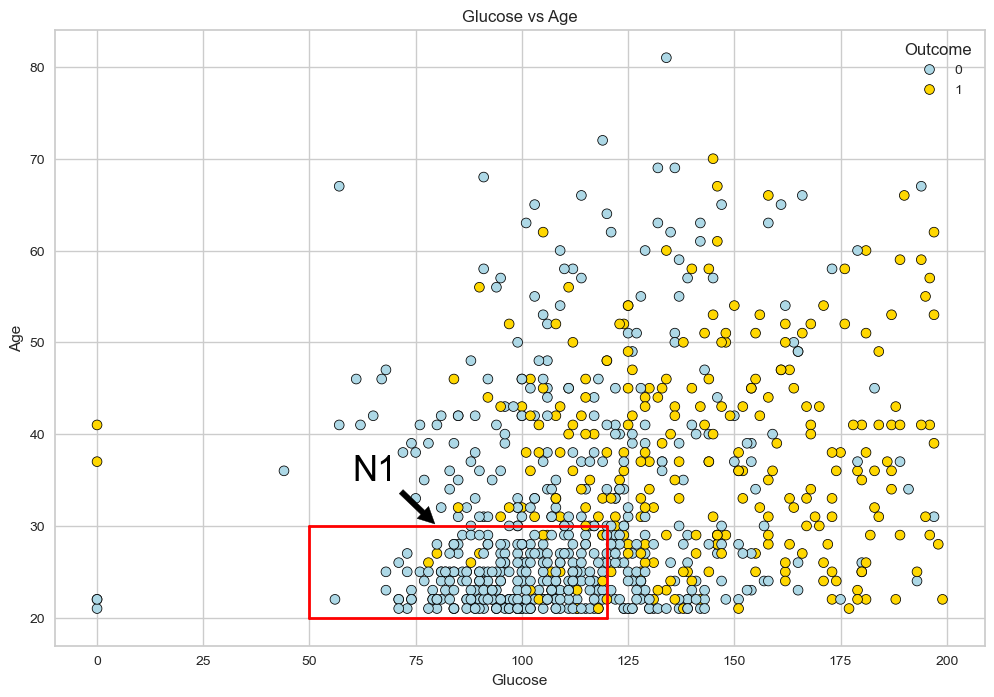

In [78]:
# Custom color mapping for the Outcome variable
custom_palette = {0: 'lightblue', 1: 'gold'}
border_color = 'black'

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Generate a scatter plot for Glucose vs Age using seaborn
ax = sns.scatterplot(x=data['Glucose'], y=data['Age'],
                     hue="Outcome", data=data,
                     palette=custom_palette, edgecolor=border_color)

# Add an annotation with an arrow at a specific point
plt.annotate('N1', fontsize=25, color='black',
             xy=(80, 30), xytext=(60, 35),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Draw red lines to outline a rectangular region on the plot
plt.plot([50, 120], [30, 30], linewidth=2, color='red')
plt.plot([120, 120], [20, 30], linewidth=2, color='red')
plt.plot([50, 120], [20, 20], linewidth=2, color='red')
plt.plot([50, 50], [20, 30], linewidth=2, color='red')

# Set the plot title and display the figure
plt.title('Glucose vs Age')
plt.show()


In [79]:
# Create a new binary column 'GroupFlag', initializing all values to 0
data.loc[:, 'GroupFlag'] = 0

# Update 'GroupFlag' to 1 for records where Age is <= 30 and Glucose is <= 120
data.loc[(data['Age'] <= 30) & (data['Glucose'] <= 120), 'GroupFlag'] = 1

# Generate a bar plot for the new 'GroupFlag' variable
# Here we call the custom bar plot function (previously defined as 'bar_plot_category')
bar_plot_category('GroupFlag', ': Glucose <= 120 and Age <= 30')


In [80]:
# Generate a dual pie chart visualization for the 'GroupFlag' variable,
# indicating the criteria: (Glucose <= 120 and Age <= 30)
pie_chart_distribution('GroupFlag', '(Glucose <= 120 and Age <= 30)')


BMI is calculated as:

**BMI = weight (kg) / (height in m)²**

A BMI of **30 kg/m² or above** is considered obese.

In [81]:
# Initialize a new column 'BMIFlag' with 0's in the dataset
data.loc[:, 'BMIFlag'] = 0

# Set 'BMIFlag' to 1 for individuals with BMI less than or equal to 30
data.loc[(data['BMI'] <= 30), 'BMIFlag'] = 1

# Generate a bar plot for the 'BMIFlag' variable using the custom bar plot function
bar_plot_category('BMIFlag', ': BMI <= 30')


In [82]:
pie_chart_distribution('BMIFlag', 'BMI <= 30')

In [83]:
plot_scatter_features('Glucose','BloodPressure')

Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

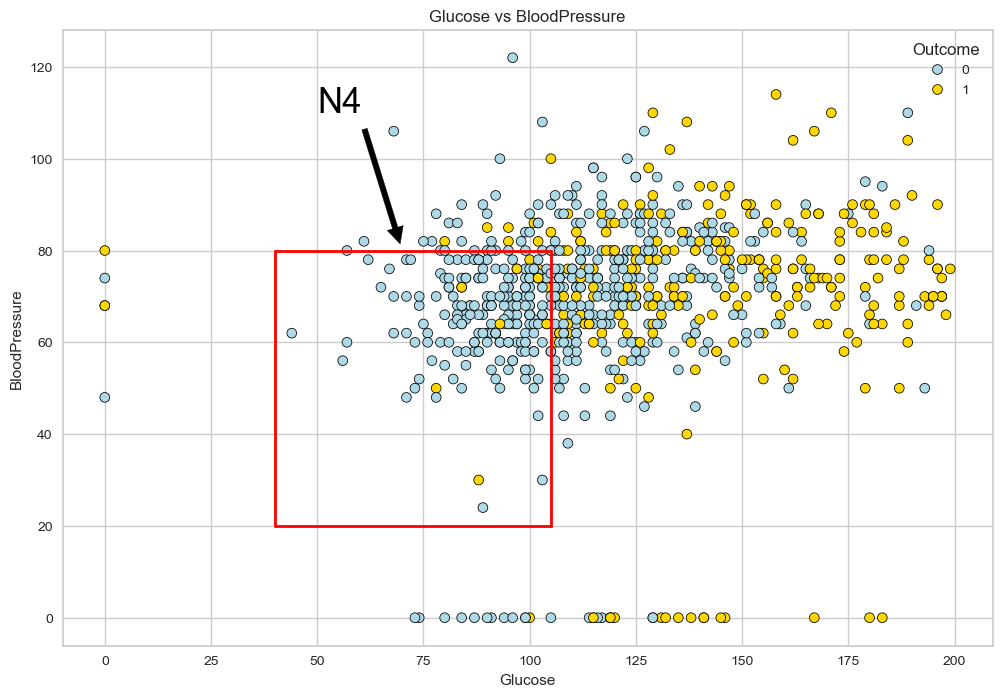

In [84]:
# Custom color palette for the Outcome variable and edge color for markers
custom_palette = {0: 'lightblue', 1: 'gold'}
border_color = 'black'

# Create a figure with the specified size
plt.figure(figsize=(12, 8))

# Generate a scatter plot for Glucose vs BloodPressure, colored by Outcome
ax = sns.scatterplot(x=data['Glucose'], 
                     y=data['BloodPressure'], 
                     hue="Outcome",
                     data=data, 
                     palette=custom_palette, 
                     edgecolor=border_color)

# Annotate the plot to highlight the region for healthy persons 
# (with BloodPressure <= 80 and Glucose <= 105)
plt.annotate('N4', fontsize=25, color='black', 
             xy=(70, 80), xytext=(50, 110),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Draw red rectangle boundaries around the healthy region:
#   Top boundary: BP = 80, from Glucose = 40 to 105
plt.plot([40, 105], [80, 80], linewidth=2, color='red')
#   Left boundary: Glucose = 40, from BP = 20 to 80
plt.plot([40, 40], [20, 80], linewidth=2, color='red')
#   Bottom boundary: BP = 20, from Glucose = 40 to 105
plt.plot([40, 105], [20, 20], linewidth=2, color='red')
#   Right boundary: Glucose = 105, from BP = 20 to 80
plt.plot([105, 105], [20, 80], linewidth=2, color='red')

# Set the title for the plot and display it
plt.title('Glucose vs BloodPressure')
plt.show()


In [85]:
# Create a new column 'HealthyIndicator' and initialize all values to 0
data.loc[:, 'HealthyIndicator'] = 0

# Update 'HealthyIndicator' to 1 for individuals with Glucose <= 105 and BloodPressure <= 80
data.loc[(data['Glucose'] <= 105) & (data['BloodPressure'] <= 80), 'HealthyIndicator'] = 1

# Generate a bar plot for the 'HealthyIndicator' variable using the custom bar plot function
bar_plot_category('HealthyIndicator', ': Glucose <= 105 and BloodPressure <= 80')


In [86]:
# Generate a dual pie chart visualization for the 'HealthyIndicator' variable,
# indicating the distribution for individuals with Glucose <= 105 and BloodPressure <= 80.
pie_chart_distribution('HealthyIndicator', 'Glucose <= 105 and BloodPressure <= 80')


## Correlation Matrix

In [87]:
def plot_correlation_matrix():
    # Compute the correlation matrix of the dataset
    corr_matrix = data.corr()
    
    # Extract column names for labeling the axes
    columns_list = corr_matrix.columns.tolist()
    
    # Convert the correlation matrix into a NumPy array for plotting
    corr_values = np.array(corr_matrix)
    
    # Create a heatmap trace with the 'Viridis' colorscale
    heatmap_trace = go.Heatmap(
        z=corr_values,
        x=columns_list,
        y=columns_list,
        colorscale='Viridis',
        colorbar=dict()
    )
    
    # Define the layout for the heatmap plot
    layout_config = go.Layout(
        dict(
            title='Correlation Matrix for Variables',
            margin=dict(r=0, l=100, t=0, b=100),
            yaxis=dict(tickfont=dict(size=9)),
            xaxis=dict(tickfont=dict(size=9))
        )
    )
    
    # Create the figure and display it using Plotly
    fig = go.Figure(data=[heatmap_trace], layout=layout_config)
    py.iplot(fig)

# Call the function to display the correlation matrix
plot_correlation_matrix()


## X and Y

In [100]:

selected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Define X and y
X = data[selected_features]
y = data['Outcome']


## Random Search and LghtGBM 

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

Faster training speed and higher efficiency.
Lower memory usage.
Better accuracy.
Support of parallel and GPU learning.
Capable of handling large-scale data.
To find the best hyperparameters, we'll use Random Search CV.

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. Generally RS is more faster and accurate than GridSearchCV who calculate all possible combinations. With Random Grid we specify the number of combinations that we want

## LightGBM + Random Search

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
✅ Model saved as lightgbm_model.pkl
✅ Scaler saved as scaler.pkl
LightGBM Accuracy on Test Set: 73.16%


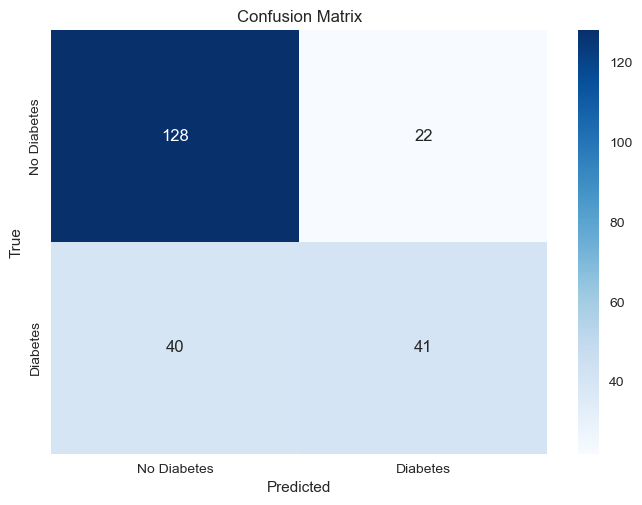

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.81       150
           1       0.65      0.51      0.57        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231


Prediction: Diabetes
Risk Percentage: 85.91%


In [98]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint, uniform as sp_uniform
import joblib

# Set random state
random_state = 42  

# Define selected features (only 8 out of 11)
selected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Assuming X and y are already defined as your feature matrix and target vector
X = X[selected_features]  # Keep only these 8 features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define fit parameters for LightGBM
fit_params = {
    "eval_metric": 'auc',
    "eval_set": [(X_train_scaled, y_train), (X_test_scaled, y_test)],
    "eval_names": ['train', 'valid'],
    "categorical_feature": 'auto'
}

# Define the parameter grid for hyperparameter tuning
param_test = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
    'num_leaves': sp_randint(6, 50),
    'min_child_samples': sp_randint(100, 500),
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8),
    'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50, 100]
}

# Number of parameter combinations to sample
n_iter = 300  

# Initialize the LightGBM classifier
lgbm_clf = lgb.LGBMClassifier(random_state=random_state, n_jobs=1, verbosity=-1)

# Set up RandomizedSearchCV
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf,
    param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True,
    n_jobs=-1
)

# Perform RandomizedSearchCV to find the best parameters
grid_search.fit(X_train_scaled, y_train, **fit_params)

# Extract the best hyperparameters
opt_parameters = grid_search.best_params_

# Reinitialize the model with the best parameters
lgbm_clf = lgb.LGBMClassifier(**opt_parameters)

# Train the model with the best parameters
lgbm_clf.fit(X_train_scaled, y_train)

# Save the trained LightGBM model
joblib.dump(lgbm_clf, 'lightgbm_model.pkl')
print("✅ Model saved as lightgbm_model.pkl")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as scaler.pkl")


# Make predictions on the test set
y_pred = lgbm_clf.predict(X_test_scaled)

# Evaluate accuracy
lgbm_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"LightGBM Accuracy on Test Set: {lgbm_accuracy:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Step 9: Prediction Function
def predict_diabetes_risk(new_data):
    """
    Predict diabetes risk and probability.
    Input order: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    """
    # Load the trained model and scaler
    model = joblib.load('lightgbm_model.pkl')
    scaler = joblib.load('scaler.pkl')
    
    # Select only the first 8 columns from X (the feature names you used for training)
    selected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    
    # Create a DataFrame using only these selected features
    new_df = pd.DataFrame([new_data], columns=selected_features)
    
    # Scale the input data using the same scaler as during training
    new_df_scaled = scaler.transform(new_df)
    
    # Predict the diabetes risk (probability)
    probability = model.predict_proba(new_df_scaled)[0][1] * 100  # Convert to percentage
    
    # Use a lower threshold of 30% to classify as 'Diabetes' or 'No Diabetes'
    prediction = 1 if probability >= 30 else 0  # Try a lower threshold, e.g., 30%
    
    return prediction, probability

# Example usage:
new_patient = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
prediction, risk = predict_diabetes_risk(new_patient)
print(f"\nPrediction: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
print(f"Risk Percentage: {risk:.2f}%")


## Random Forest Model

Model saved as 'random_forest_diabetes_model.pkl' ✅
Random Forest Accuracy on Test Set: 77.06%


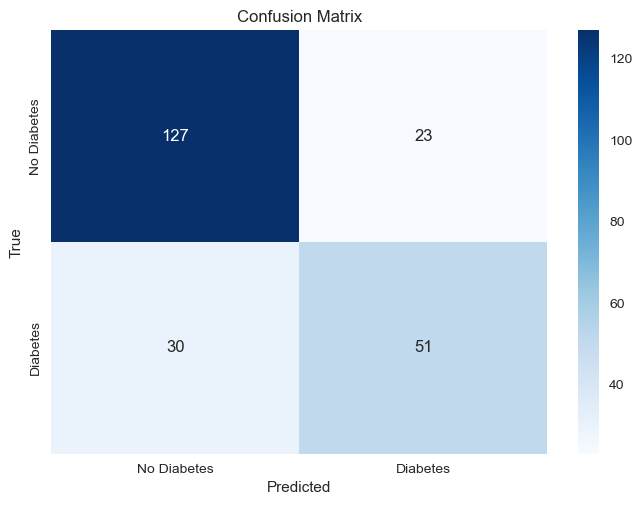

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.69      0.63      0.66        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231

Prediction: No Diabetes


In [101]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Ensure X is numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce')  # Convert categorical to numeric (if needed)
y = y.astype(int)  # Ensure target variable is integer

# Fill NaN values with column median
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=50,  # Reduced for efficiency
    cv=5,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_resampled, y_train_resampled)  # Fit the random search

# Train Random Forest with best parameters
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=42, n_jobs=-1)
best_rf.fit(X_train_resampled, y_train_resampled)

# Save the trained model
joblib.dump(best_rf, "random_forest_diabetes_model.pkl")
print("Model saved as 'random_forest_diabetes_model.pkl' ✅")

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
rfc_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Accuracy on Test Set: {rfc_accuracy:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# ✅ Prediction Function
def predict_diabetes(input_data):
    """
    Predicts diabetes based on user input.
    
    :param input_data: List or array of 8 numerical features [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    :return: "Diabetes" or "No Diabetes"
    """
    model = joblib.load("random_forest_diabetes_model.pkl")  # Load the saved model
    input_array = np.array(input_data).reshape(1, -1)  # Convert input into proper format
    prediction = model.predict(input_array)[0]  # Get prediction (0 = No Diabetes, 1 = Diabetes)
    
    return "Diabetes" if prediction == 1 else "No Diabetes"

# Example Usage
sample_input = [2, 120, 70, 30, 125, 32.0, 0.5, 40]  # Replace with real user input
print("Prediction:", predict_diabetes(sample_input))


## Comparing both models

In [104]:
# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb) * 100
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100

# Compare results
print("✅ Model Accuracy Comparison:")
print(f"🔷 LightGBM Accuracy:     {accuracy_lgb:.2f}%")
print(f"🟢 Random Forest Accuracy: {accuracy_rf:.2f}%")

# the better model
better_model = "LightGBM" if accuracy_lgb > accuracy_rf else "Random Forest"
print(f"\n🏆 Better Performing Model: {better_model}")


✅ Model Accuracy Comparison:
🔷 LightGBM Accuracy:     73.16%
🟢 Random Forest Accuracy: 77.06%

🏆 Better Performing Model: Random Forest


#### 